In [5]:
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [6]:
from youtube_transcript_api import YouTubeTranscriptApi

id_video = 'CUwg_JoNHpo'
srt = YouTubeTranscriptApi.get_transcript(id_video, languages=['en'])

print(srt[-1])

{'text': 'Apple Event', 'start': 3691.253, 'duration': 3.004}


In [7]:
subtext = []
for i in range(len(srt)):
    subtext.append(srt[i].get('text'))
print(subtext[:10])

['Apple Event', 'Apple Event', 'Apple Event', 'Apple Event', 'Apple Event', 'Apple Event', 'Apple Event', 'Apple Event', 'Apple Event', 'Apple Event']


In [8]:
print(len(subtext))

895


In [9]:
subtext[:] = (value for value in subtext if value != 'Apple Event' and value != '[♪ ♪]')
print(subtext[:10])

['[upbeat music]', 'Tim: Good morning,\nand welcome back to Apple Park!', 'Thank you for joining us\nfor our first event of 2022.', 'Today we have some great\nannouncements to share.', "We've been working hard\nto deliver new products and\nservices", 'that help you stay connected,\nproductive, and entertained.', "So let's start with Apple TV+.", "Like many of you, I've been\nwatching a lot of shows and\nmovies", "with the time\nI've been spending at home.", 'Along with our great original\nseries like Ted Lasso, The\nMorning Show,']


In [32]:
print(len(subtext[1]))

50


In [33]:
count = 0
for i in subtext:
    # split string by whitespace then count length
    temp = i.split()
    count += len(temp)
print(f'The average length of sentence in apple event is {count/len(subtext)}')

The average length of sentence in apple event is 8.02235294117647


In [34]:
print(f'after cleaning apple event and music subtitles, the len of the subtext is: {len(subtext)}')

after cleaning apple event and music subtitles, the len of the subtext is: 850


In [11]:
import string
from nltk.corpus import stopwords
stop = set(stopwords.words('english') + list(string.punctuation))
stop.add('And')
stop.add('The')
print(stop)

{'they', 'very', 'o', 'more', '=', 'after', 'just', 'ourselves', "'", 'than', 'does', "don't", 'hadn', 'what', 'in', "you'd", 'up', 'theirs', 'over', 'but', 'hasn', 'he', 'at', 'did', 'was', 'until', '^', 'my', "she's", '\\', 'now', 'most', 'where', 'are', 'a', 'have', 'once', '{', 'themselves', 'aren', 'isn', 'be', 'about', "you've", 'all', 'same', 'shouldn', "doesn't", 'of', ',', 'wouldn', 'while', 'from', 'our', 'against', '$', 'as', 'above', 'yourself', 'having', 'for', '.', '?', 'she', 'under', 't', 'myself', "hasn't", ')', 'you', 'which', '~', "you'll", 'their', 's', 'both', 're', 'me', 'with', 'not', '%', 'him', ';', 'such', "shouldn't", 'needn', 'by', 'm', 'further', 'doesn', '/', 'yourselves', 'hers', 'these', 'has', "wasn't", 'this', 'd', 'if', 'here', 'only', '"', 'how', '<', '>', 'herself', 'it', 'And', "aren't", 'can', 'each', 'them', 'the', 'doing', 'weren', 'being', 'between', 'out', "you're", "wouldn't", 'haven', 'wasn', 'don', "shan't", 'that', 'to', 'why', '@', "needn

In [12]:
print('.' in stop)
print(',' in stop)

True
True


In [13]:
subtext_str = ' '.join(subtext)
len(subtext_str)

40759

In [14]:
subtext_list = []
for i in subtext:
    temp = ''
    for j in i:
        if j != ' ':
            temp +=j
        elif j == ' ':
            subtext_list.append(temp)
            temp = ''
len(subtext_list)

5094

In [15]:
outputlist = [word for word in subtext_list if word not in stop]
len(outputlist)

3111

In [16]:
subtext_str = ' '.join(outputlist)
len(subtext_str)

24657

In [17]:
subtext_str

'[upbeat Tim: Good morning,\nand welcome back Apple Thank joining us\nfor first event Today great\nannouncements We\'ve working hard\nto deliver new products help stay connected,\nproductive, So let\'s start Apple Like many you, I\'ve been\nwatching lot shows time\nI\'ve spending Along great original\nseries like Ted Lasso, The\nMorning For All Mankind, Servant,\nand we\'re working the\nmost imaginative filmmakers in\nthe making great original movies\nas like emotional powerhouse\nSwan featuring riveting performance\nby Mahershala earned lead actor\nnomination Joel Coen\'s\nThe Tragedy starring Denzel Washington\nand Frances This beautiful film was\nnominated three including Best Remarkably, Denzel\'s\ntenth Academy Award CODA, also\nnominated three including Best CODA powerful inspiring\nstory, broke predominantly deaf\ncast, including Troy became first deaf male\nactor nominated Now let\'s take quick look\nat Apple Original incredible ones\ncoming [soft I Just take deep Are Is dagger

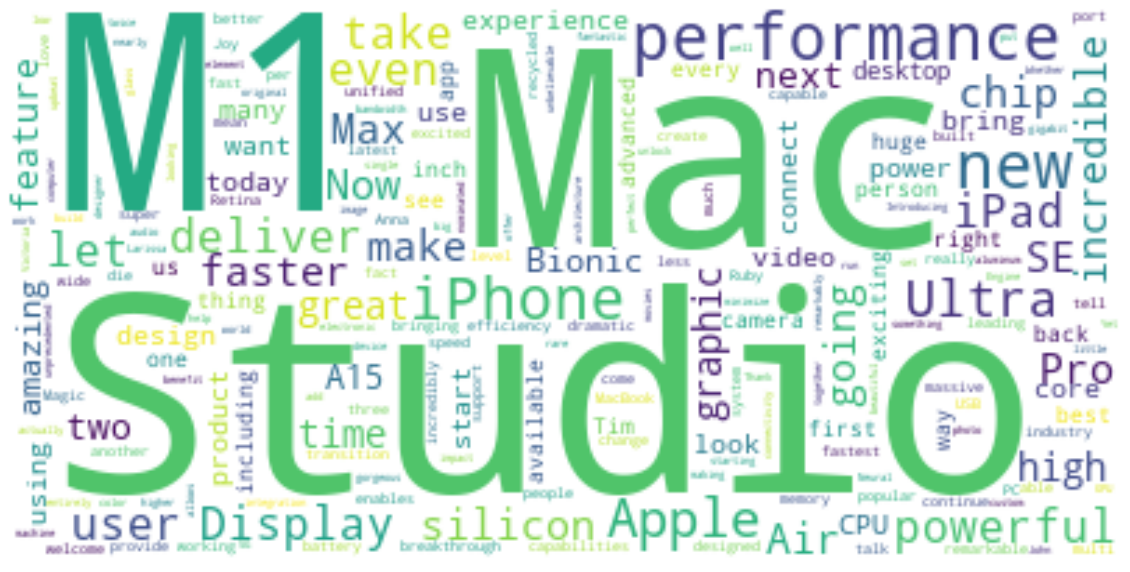

In [46]:
wordcloud = WordCloud(max_font_size=100, max_words=500, background_color="white",collocations=False).generate(subtext_str)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

(-0.5, 2999.5, 1999.5, -0.5)

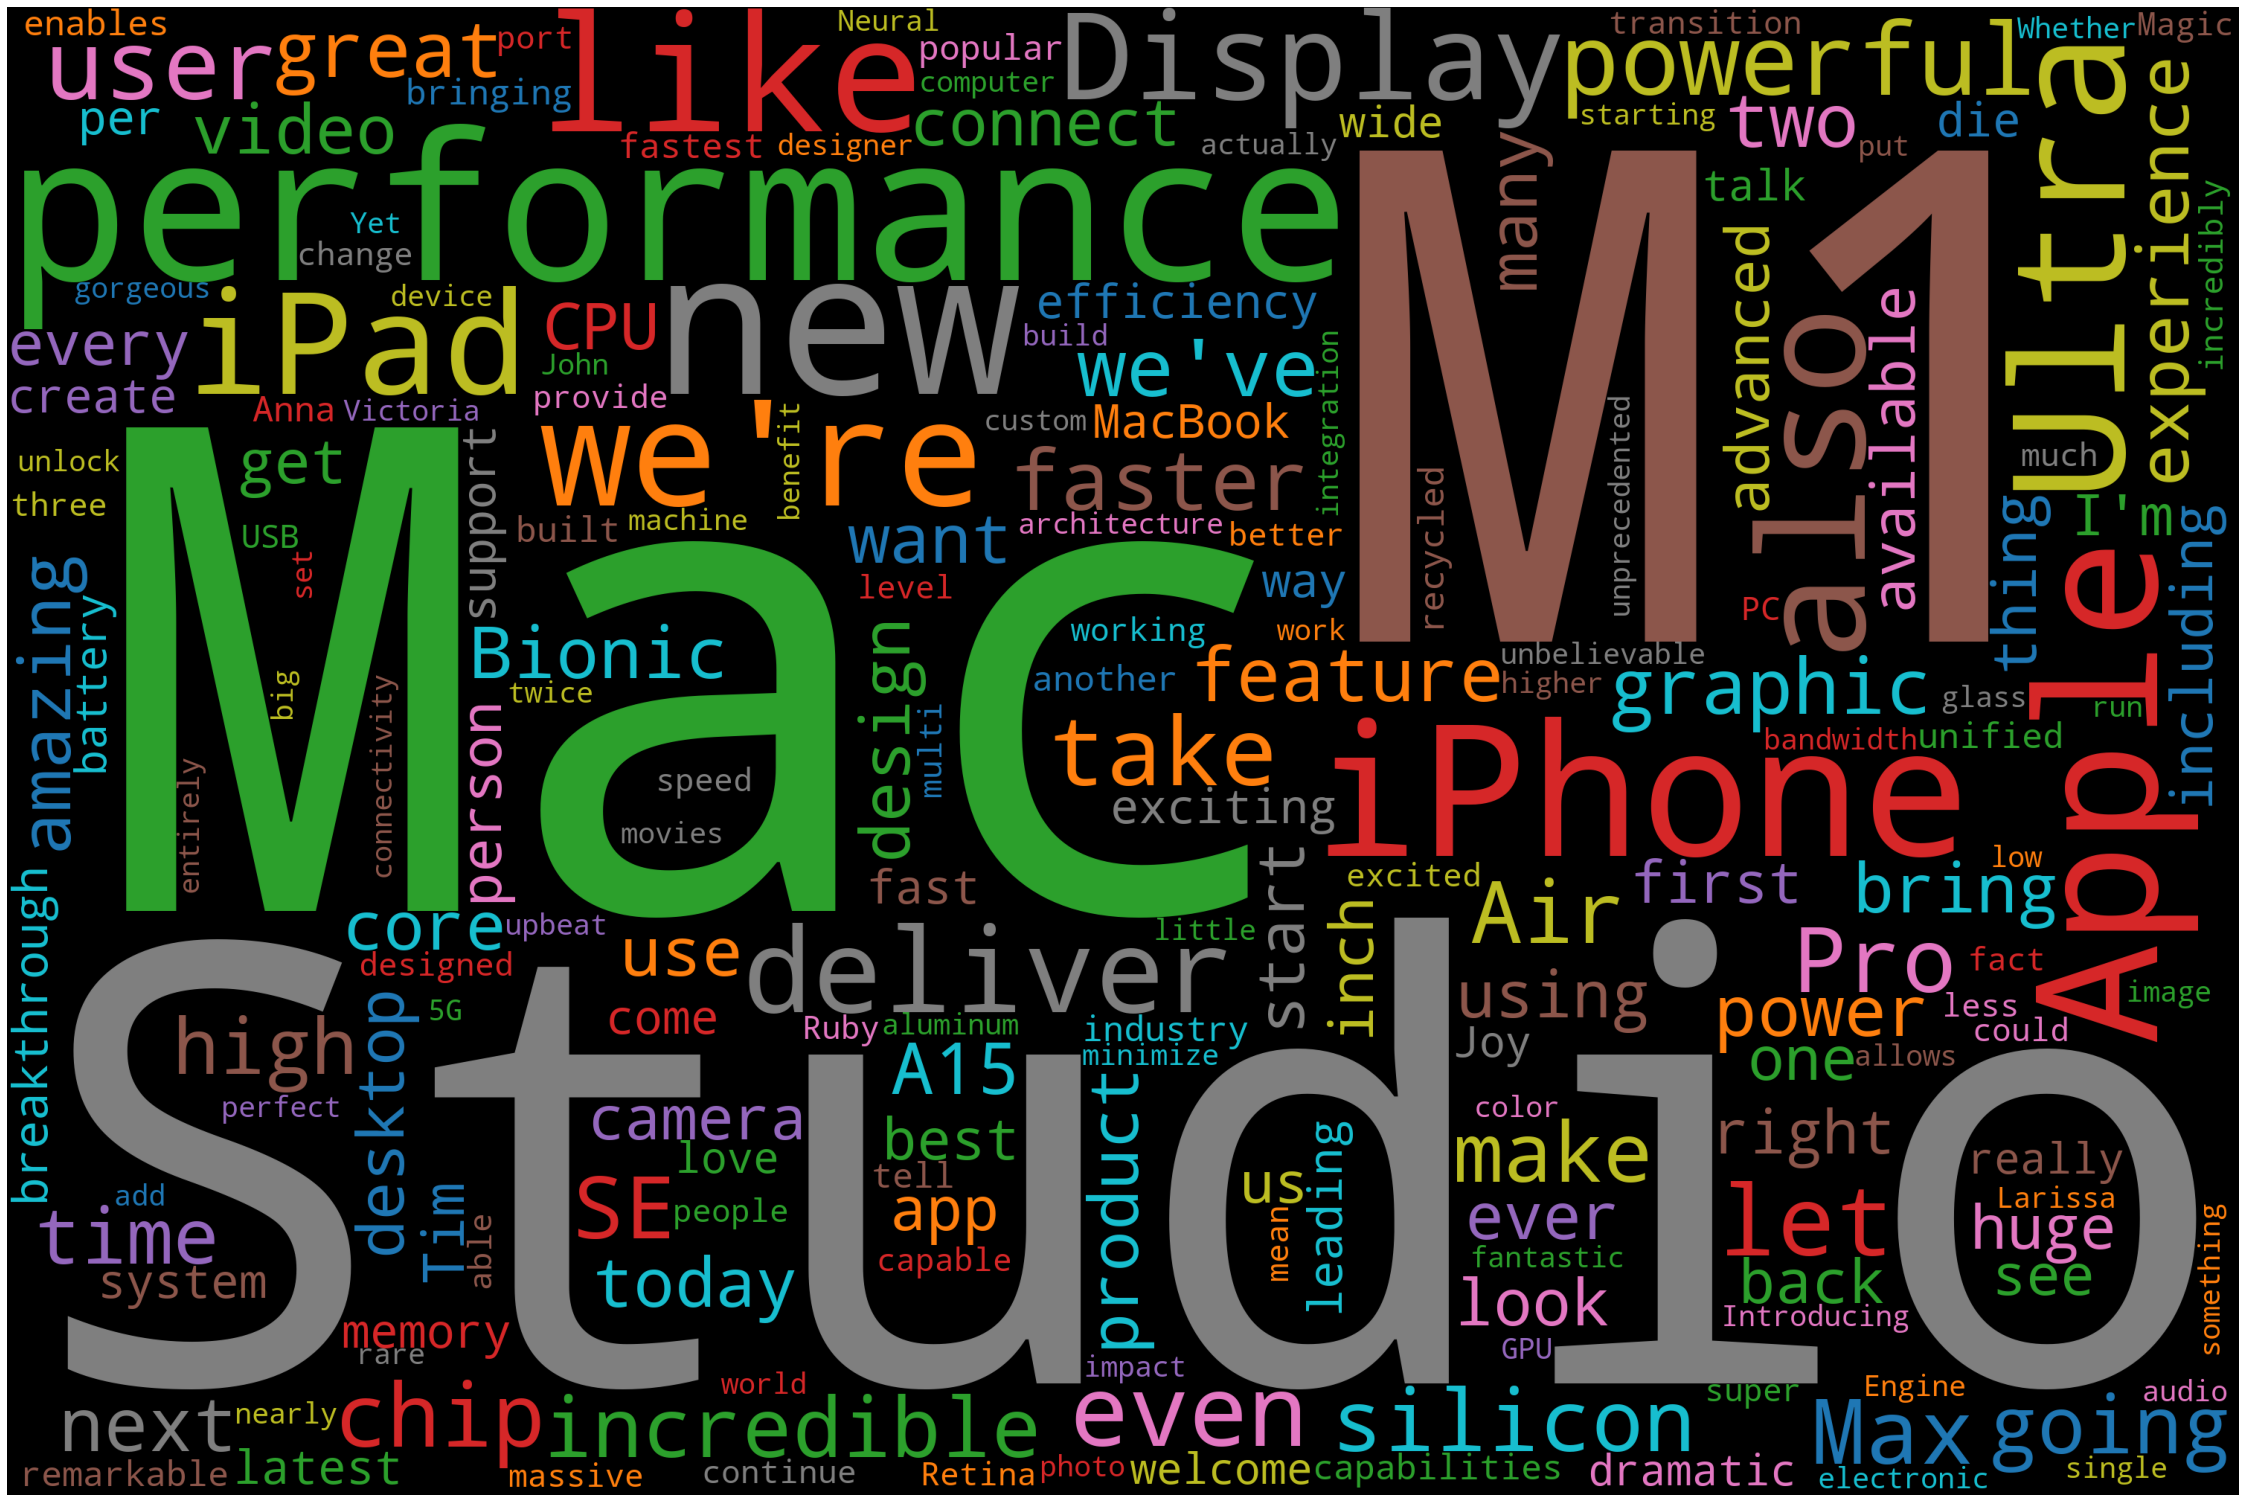

In [51]:
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      random_state=42,
                      background_color='black',
                      colormap='tab10',
                      collocations=False,
                      stopwords = stop).generate(subtext_str)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis("off")

In [ ]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [54]:
def black_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return ('hsl(0, 100%, 1%)')

(-0.5, 2999.5, 1999.5, -0.5)

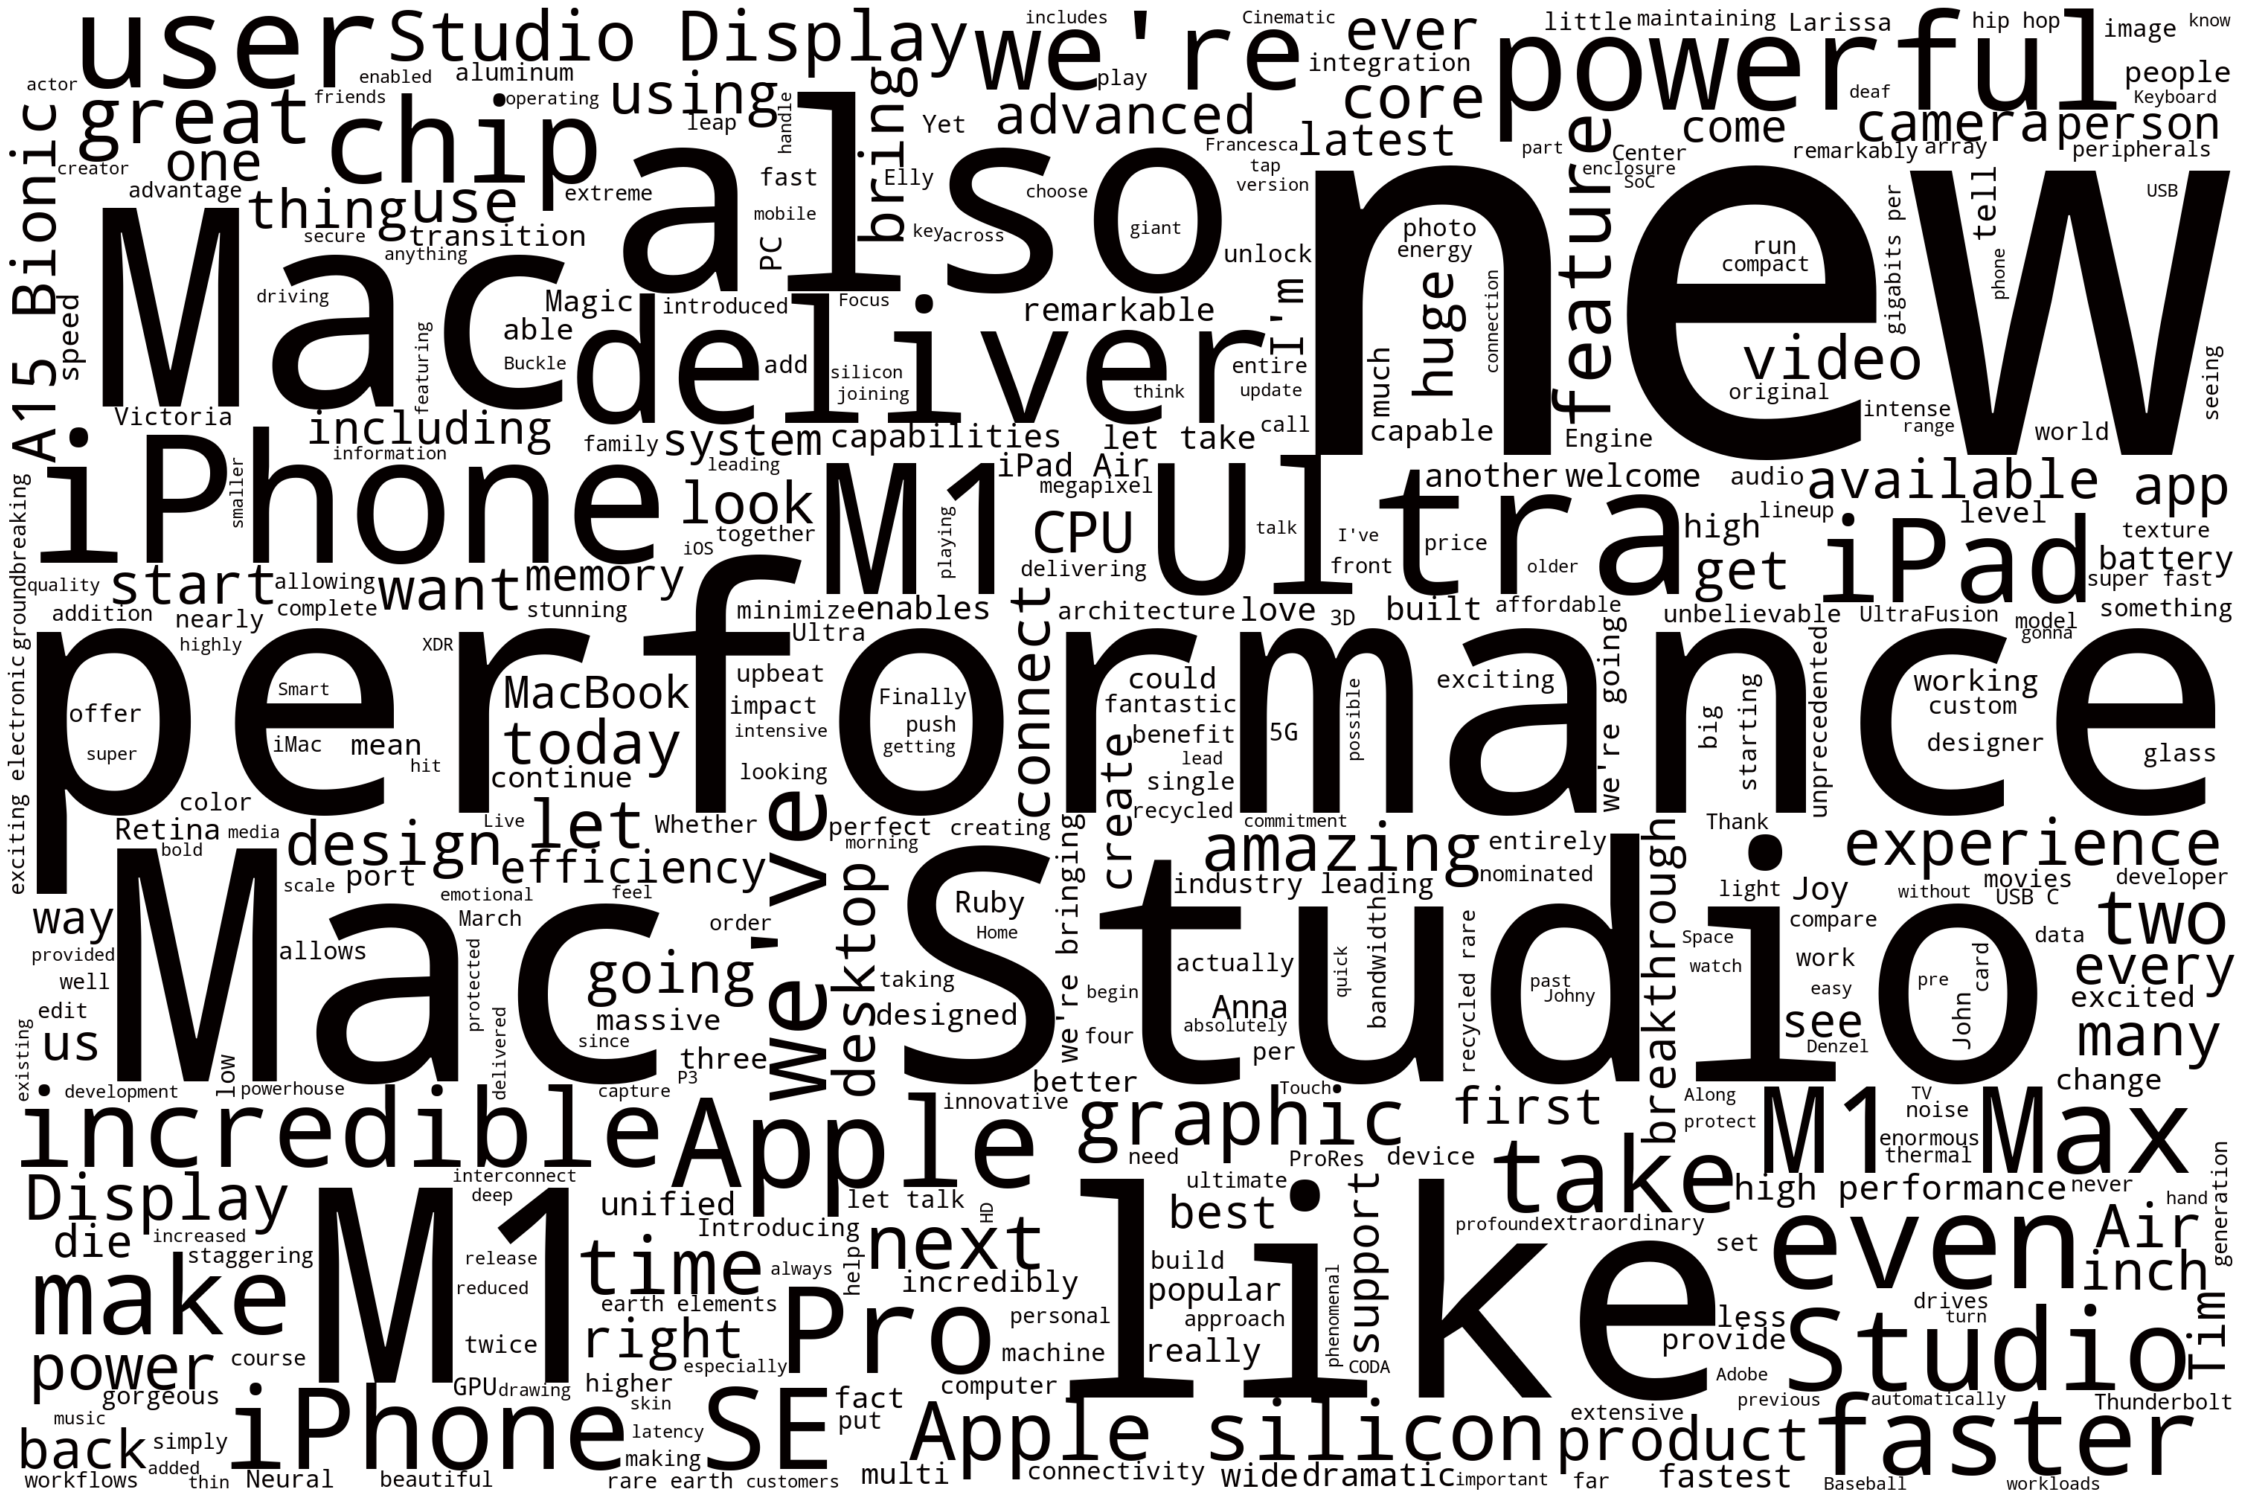

In [58]:
mask1 = np.array(Image.open('./png-apple-logo-9711.png'))
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      random_state=42,
                      background_color='white',
                      max_words=400,
                      stopwords = stop).generate(subtext_str)
wordcloud.recolor(color_func=black_color_func)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")


In [61]:
# add masking colors based on mask image
from wordcloud import ImageColorGenerator

(-0.5, 2271.5, 1703.5, -0.5)

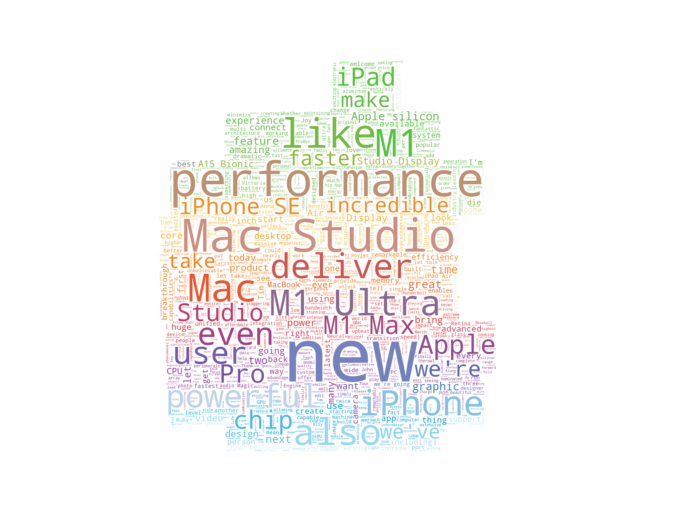

In [63]:
mask = np.array(Image.open('./png-apple-logo-9735.png'))
mask_colors = ImageColorGenerator(mask)
wordcloud = WordCloud(background_color="white",
                      max_words=1500,
                      mask=mask,
                      stopwords=stop,
                      random_state=42,
                      width=mask.shape[1],
                      height=mask.shape[0],
                      color_func=mask_colors).generate(subtext_str)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

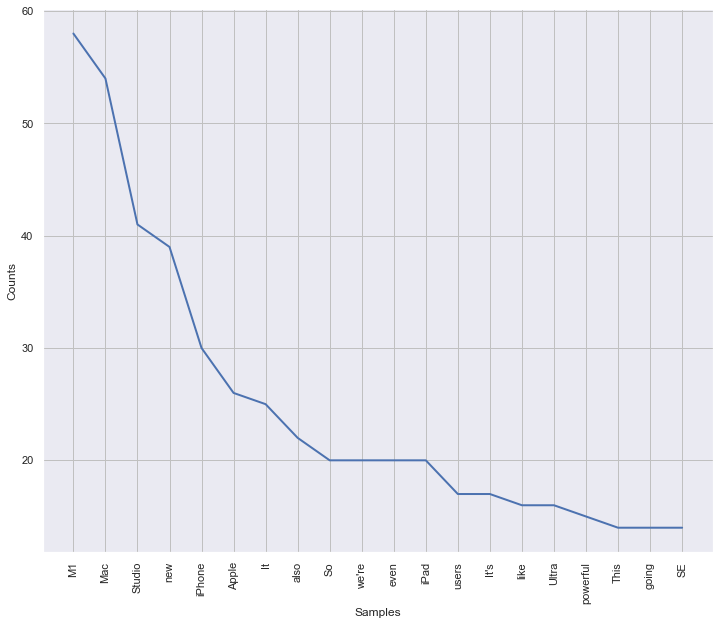

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [20]:
import nltk
%matplotlib inline
sns.set(rc={'figure.figsize':(12,10)})
sns.set_style( 'darkgrid')
# Create freq dist and plot
nlp_words = nltk.FreqDist(outputlist)
nlp_words.plot(20)

In [42]:
print('The top 10 most frequent words in this Apple event')
print(nlp_words.most_common(10))

The top 10 most frequent words in this Apple event
[('M1', 58), ('Mac', 54), ('Studio', 41), ('new', 39), ('iPhone', 30), ('Apple', 26), ('It', 25), ('also', 22), ('So', 20), ("we're", 20)]


In [21]:
nltk.download('punkt')
tokens = nltk.word_tokenize(subtext_str)
bigrams = nltk.bigrams(tokens)
frequence = nltk.FreqDist(bigrams)
for key, value in frequence.items():
    print(key,value)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/andycheung/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


('[', 'upbeat') 3
('upbeat', 'Tim') 1
('Tim', ':') 7
(':', 'Good') 1
('Good', 'morning') 1
('morning', ',') 1
(',', 'and') 14
('and', 'welcome') 1
('welcome', 'back') 1
('back', 'Apple') 1
('Apple', 'Thank') 1
('Thank', 'joining') 2
('joining', 'us') 1
('us', 'for') 1
('for', 'first') 3
('first', 'event') 1
('event', 'Today') 1
('Today', 'great') 1
('great', 'announcements') 1
('announcements', 'We') 1
('We', "'ve") 3
("'ve", 'working') 1
('working', 'hard') 1
('hard', 'to') 1
('to', 'deliver') 1
('deliver', 'new') 1
('new', 'products') 1
('products', 'help') 1
('help', 'stay') 1
('stay', 'connected') 1
('connected', ',') 1
(',', 'productive') 1
('productive', ',') 1
(',', 'So') 2
('So', 'let') 5
('let', "'s") 13
("'s", 'start') 4
('start', 'Apple') 1
('Apple', 'Like') 1
('Like', 'many') 1
('many', 'you') 1
('you', ',') 1
(',', 'I') 7
('I', "'ve") 2
("'ve", 'been') 1
('been', 'watching') 1
('watching', 'lot') 1
('lot', 'shows') 1
('shows', 'time') 1
('time', 'I') 1
("'ve", 'spending') 

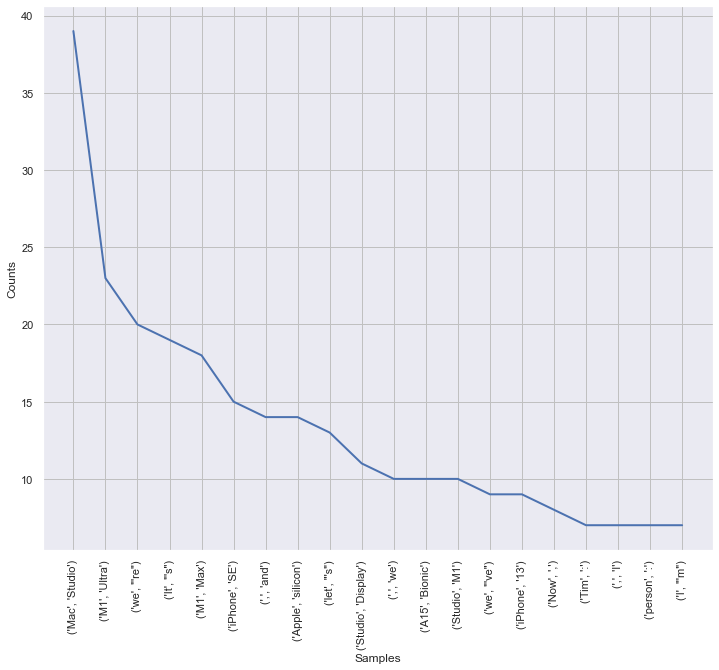

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [22]:
frequence.plot(20)

In [44]:
print('The top 5 most frequent pair of words in this event')
print(frequence.most_common(5))

The top 5 most frequent pair of words in this event
[(('Mac', 'Studio'), 39), (('M1', 'Ultra'), 23), (('we', "'re"), 20), (('It', "'s"), 19), (('M1', 'Max'), 18)]


In [27]:
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

from pprint import pprint

import spacy

import pickle
import re
import pyLDAvis
import pyLDAvis.gensim_models

import matplotlib.pyplot as plt
import pandas as pd